## Heart Attack Analysis & Prediction

### 1. Data Analysis & Processing
1.1 Basic information
1.2 Types analysis
1.3 Checking missing values
1.4 Data balancing

Data shape: (303, 14)
Column names:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Types:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Null Occurrences:
, age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


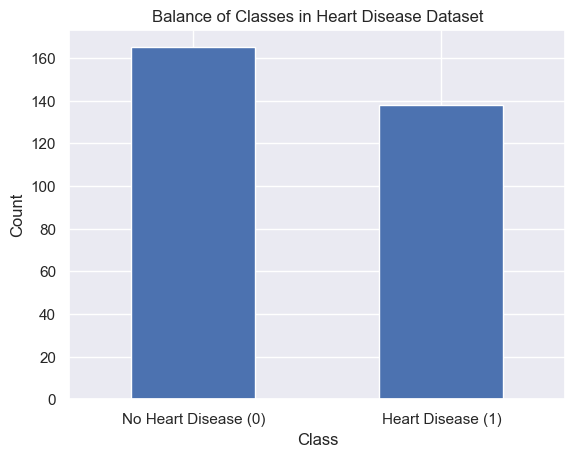

In [254]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display
import time
import seaborn as sns; sns.set()
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')
print(f'Data shape: {df.shape}')
print(f'Column names:\n {df.columns.tolist()}')
display(df.head())
print(f'\nTypes: {df.dtypes}')
print(f'\nNull Occurrences:\n, {df.isnull().sum()}')
# Balance of data
class_counts = df['output'].value_counts()
class_counts.plot(kind='bar')
plt.title('Balance of Classes in Heart Disease Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'], rotation=0)
plt.show()


Conclusion 1: There are no missing values, so we don't need to delete any data.
Conclusion 2: It can be seen that the number of cases for both classes (presence of heart disease (1) and absence of heart disease (0)) is comparable, suggesting relatively good balance of the data. This balance between classes is desirable in data analysis and predictive modeling because it helps prevent the model from being biased towards the dominant class.

### Attributes definitions
1. age - Age of the person (age in years)
2. sex - Gender of the person (1 = male; 0 = female)
3. cp - Chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trtbps - Resting blood pressure (in mm Hg)
5. chol - Cholesterol in mg/dl fetched via BMI sensor
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - Resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalachh - Maximum heart rate achieved
9. exng - Exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slp: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. output: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

1.5 Exploratory Data Analysis:


Descriptive statistics


,age,resting_blood_pressure_mmHg,cholesterol_mgdl,max_heart_rate_achieved,st_depression_exercise_vs_rest,number_major_vessels_flourosopy
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


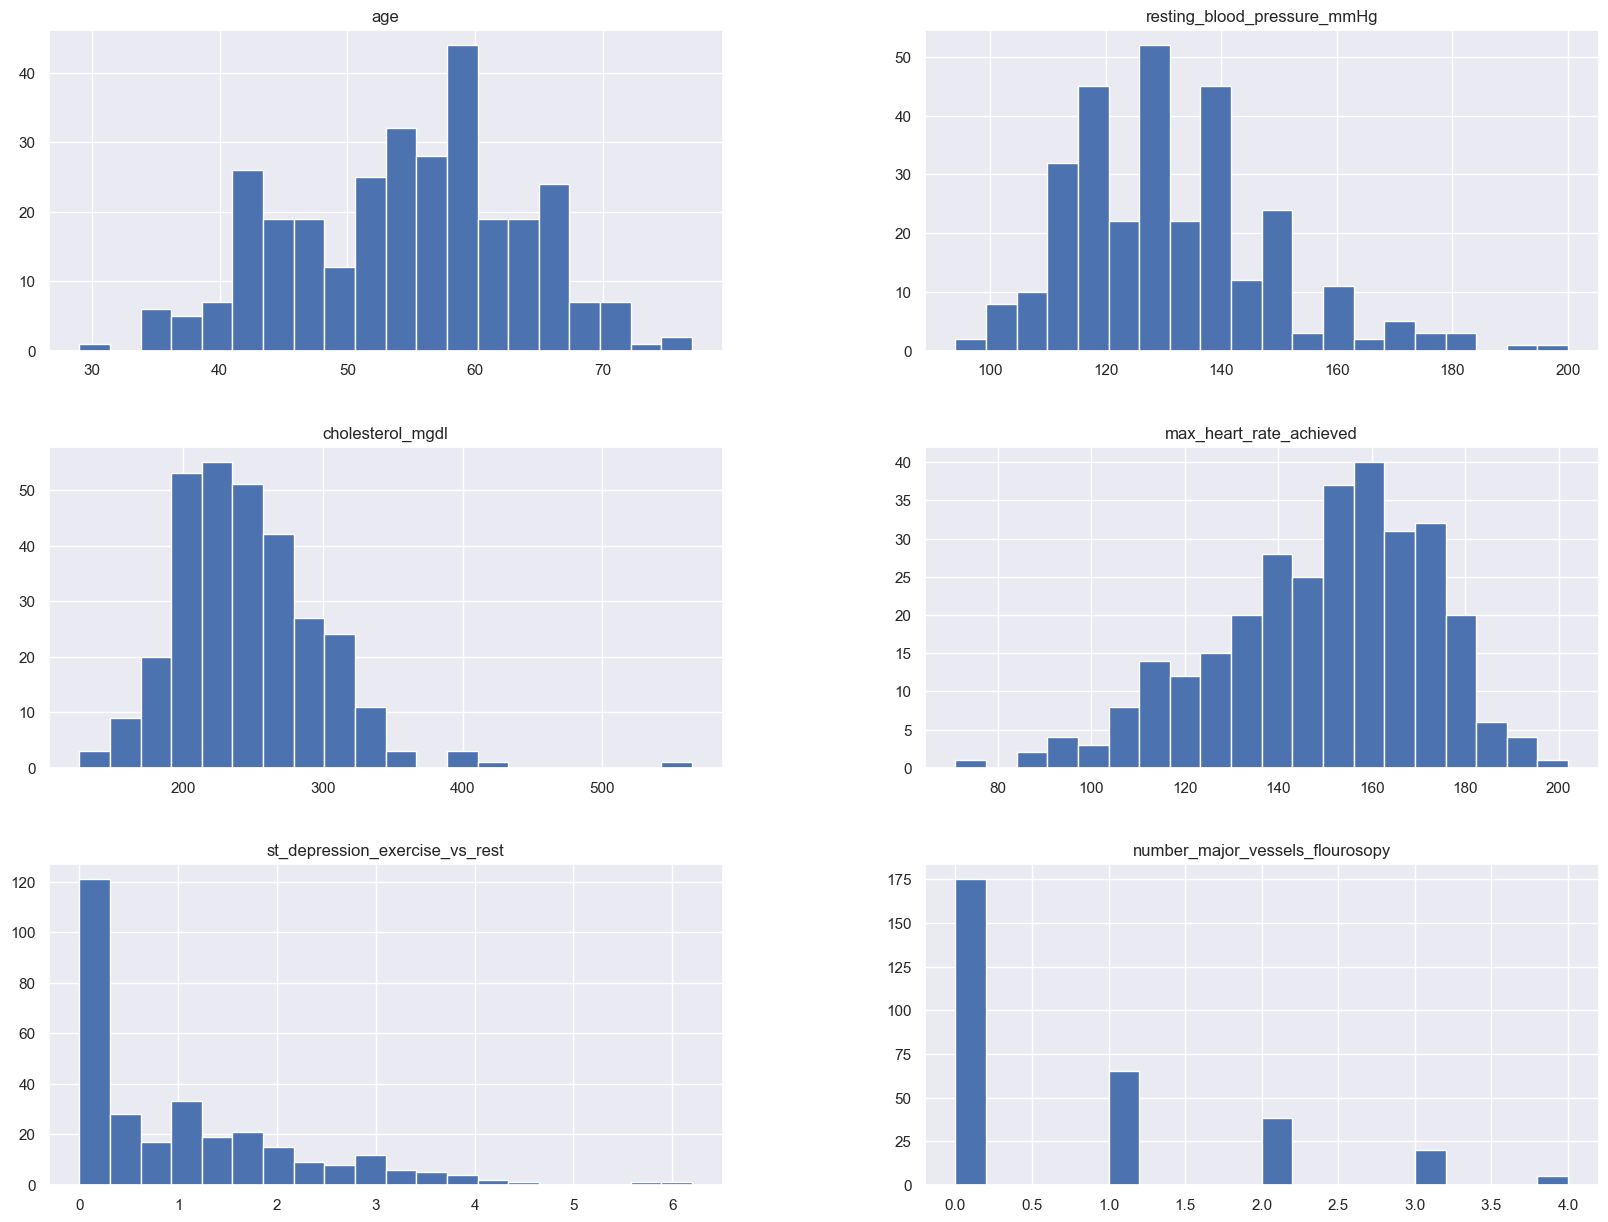

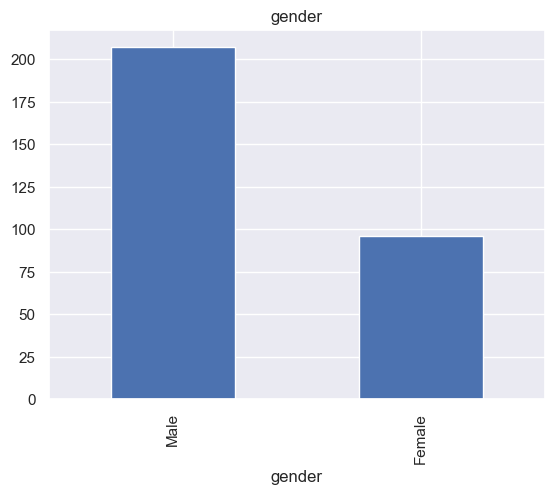

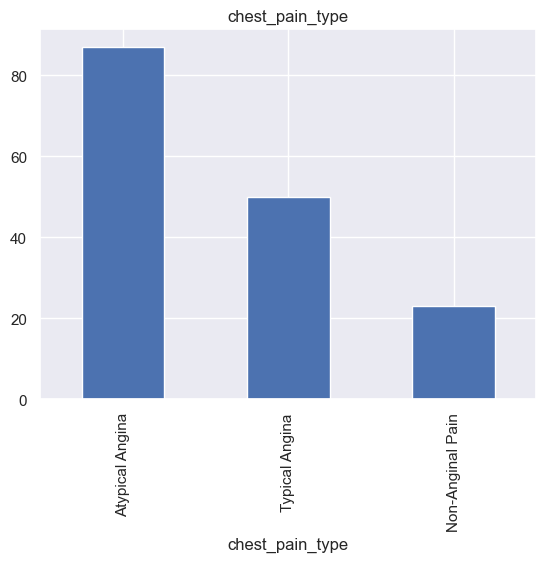

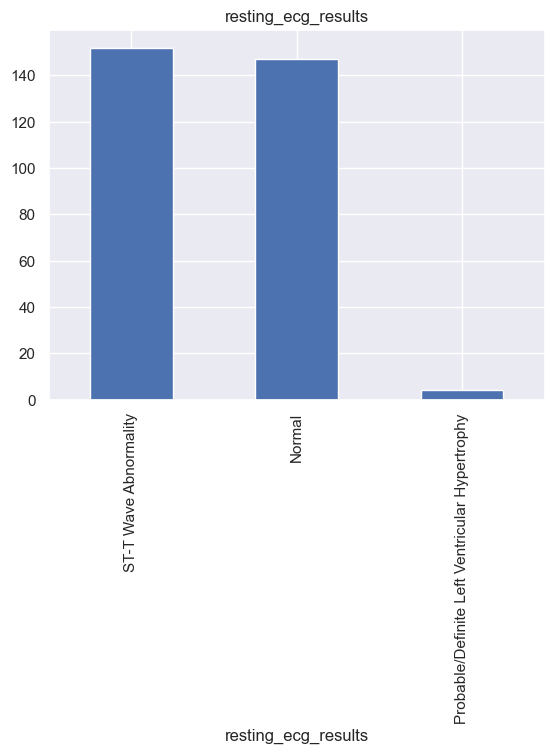

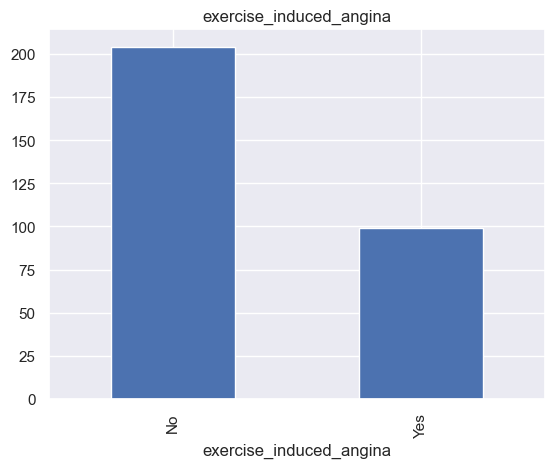

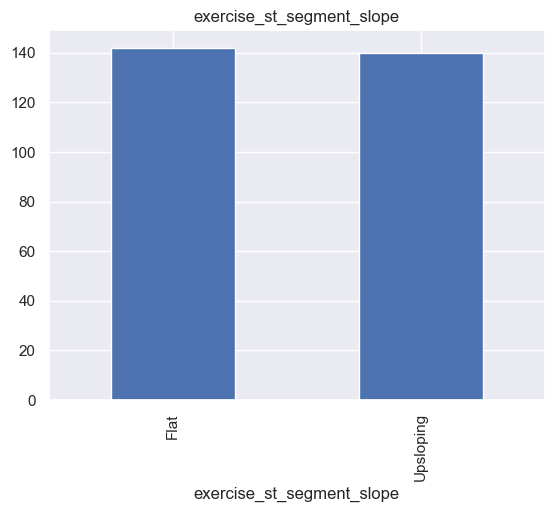

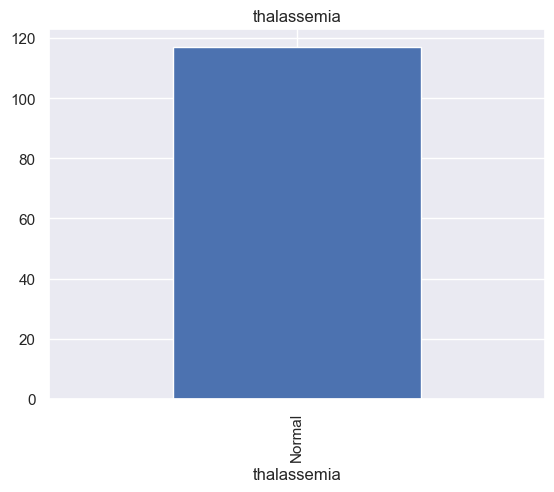

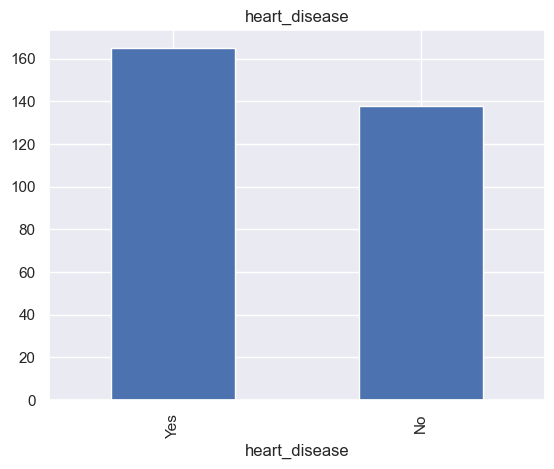

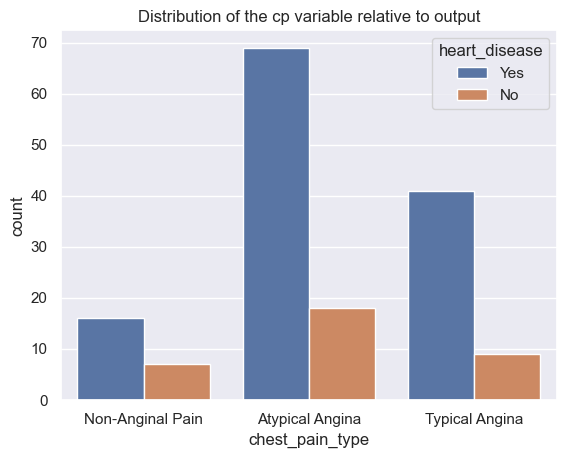

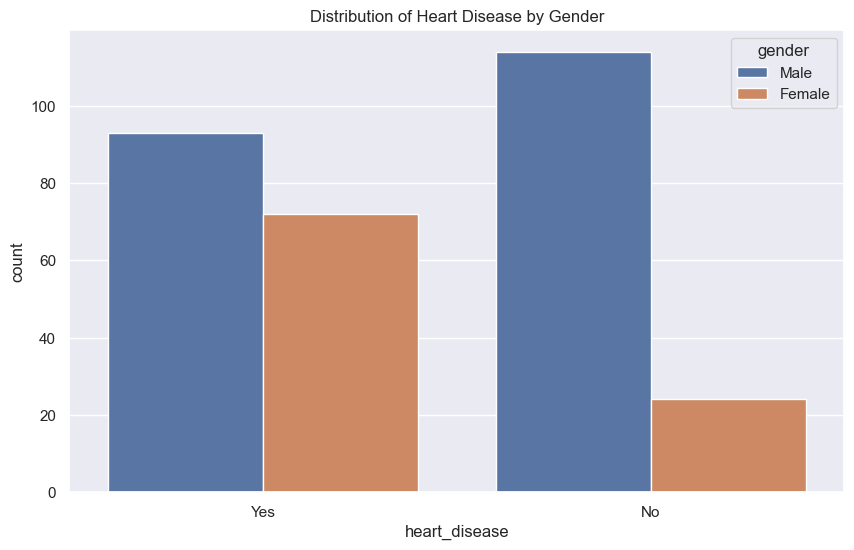

In [255]:
df_copy = df.copy()
df_copy.columns = [
    'age',
    'gender',
    'chest_pain_type',
    'resting_blood_pressure_mmHg',
    'cholesterol_mgdl',
    'fasting_blood_sugar_above_120mgdl',
    'resting_ecg_results',
    'max_heart_rate_achieved',
    'exercise_induced_angina',
    'st_depression_exercise_vs_rest',
    'exercise_st_segment_slope',
    'number_major_vessels_flourosopy',
    'thalassemia',
    'heart_disease'
]

df_copy['gender'] = df_copy['gender'].map({1: 'Male', 0: 'Female'})
df_copy['chest_pain_type'] = df_copy['chest_pain_type'].map({1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal Pain', 4: 'Asymptomatic'})
df_copy['fasting_blood_sugar_above_120mgdl'] = df_copy['fasting_blood_sugar_above_120mgdl'].map({1: True, 0: False})
df_copy['resting_ecg_results'] = df_copy['resting_ecg_results'].map({0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Probable/Definite Left Ventricular Hypertrophy'})
df_copy['exercise_induced_angina'] = df_copy['exercise_induced_angina'].map({1: 'Yes', 0: 'No'})
df_copy['exercise_st_segment_slope'] = df_copy['exercise_st_segment_slope'].map({1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'})
df_copy['thalassemia'] = df_copy['thalassemia'].map({3: 'Normal', 6: 'Fixed Defect', 7: 'Reversible Defect'})
df_copy['heart_disease'] = df_copy['heart_disease'].map({0: 'No', 1: 'Yes'})

print('Descriptive statistics')
display(df_copy.describe())

df_copy.hist(bins=20, figsize=(20, 15))
plt.show()

categorical_columns = df_copy.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_copy[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

# Example for categorical variable 'chest_pain_type' and target variable 'heart_disease'
sns.countplot(x='chest_pain_type', hue='heart_disease', data=df_copy)
plt.title('Distribution of the cp variable relative to output')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='heart_disease', hue='gender', data=df_copy)
plt.title('Distribution of Heart Disease by Gender')
plt.show()

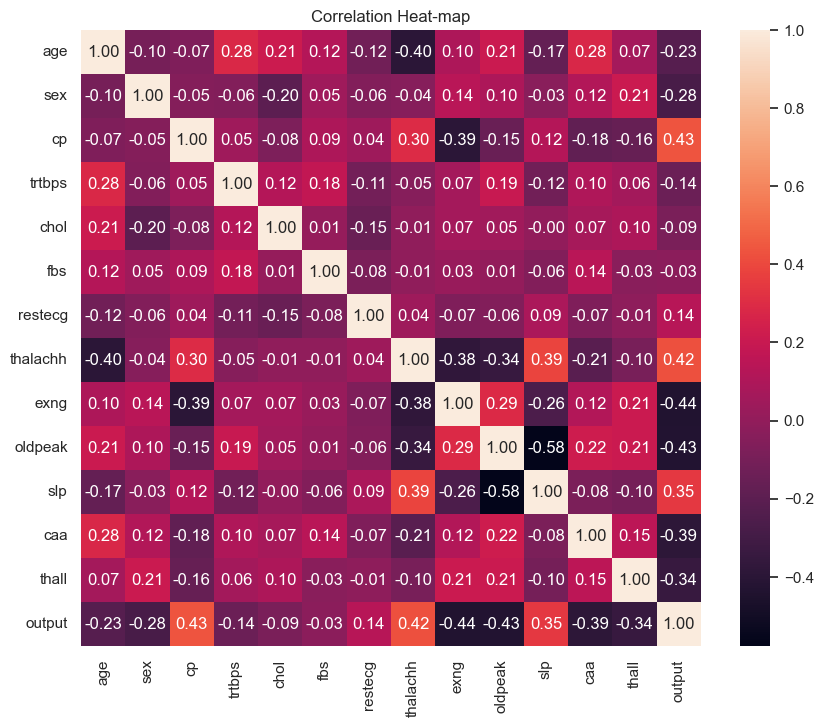

In [256]:
corr = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heat-map")
plt.show()

Conclusion: In relation to the target variable 'output', the 'chest pain type', 'maximum heart rate achieved' and 'slope of the peak exercise ST segment' attributes show the highest correlation.

1.6 Which Scaler we're going to use?

In [257]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Determine which values in the DataFrame are outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
age          0
sex          0
cp           0
trtbps       9
chol         5
fbs         45
restecg      0
thalachh     1
exng         0
oldpeak      5
slp          0
caa         25
thall        2
output       0
dtype: int64


Due to columns such as 'trtbps', 'chol', 'fbs', 'oldpeak', 'caa', 'thall' which have outlier values, we will use RobustScaler for standardization, which handles such values well.
It scales data using statistics that are resistant to outliers (median and interquartile range).

In [258]:
print("After RobustScaler normalization:\n")
columns_to_scale = df.columns.drop('output')
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
display(df.head())

After RobustScaler normalization:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0,1
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0,1
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0,1
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0,1
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0,1


### 2. Finding the best evaluation model
### 2.1 K-NN

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Time to train the model with the best parameters: 0.0006809234619140625 seconds
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


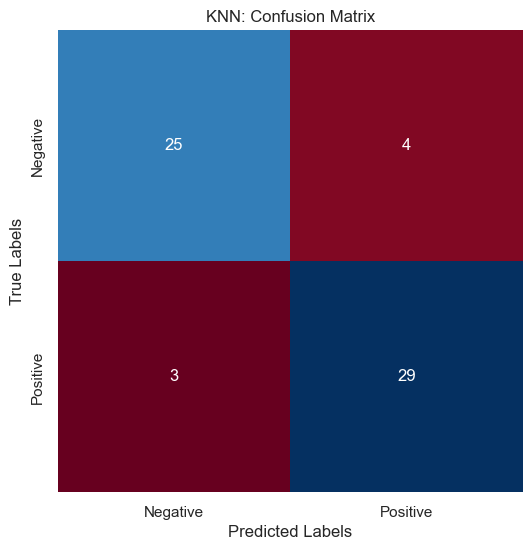

In [259]:
X = df.drop('output', axis=1)
y = df['output']
# Division into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
# Parameters
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
# Training the best model and measuring its training time
knn_best = KNeighborsClassifier(**grid_search.best_params_)
start_time = time.time()
knn_best.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Time to train the model with the best parameters: {elapsed_time} seconds")

y_pred = knn_best.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('KNN: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 2.2 Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


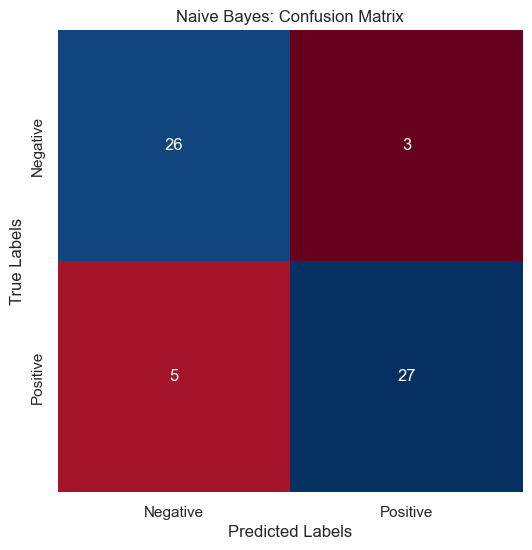

In [260]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Naive Bayes: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 2.3 Logistic Regression 

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


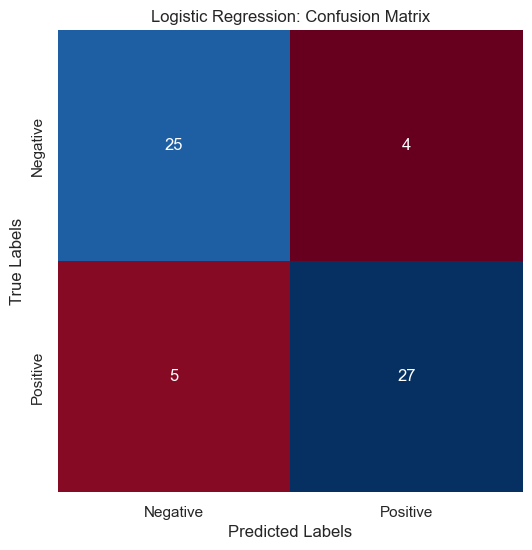

In [261]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))  
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 2.4 SVM

Time to train the SVM model: 0.0036001205444335938 seconds
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


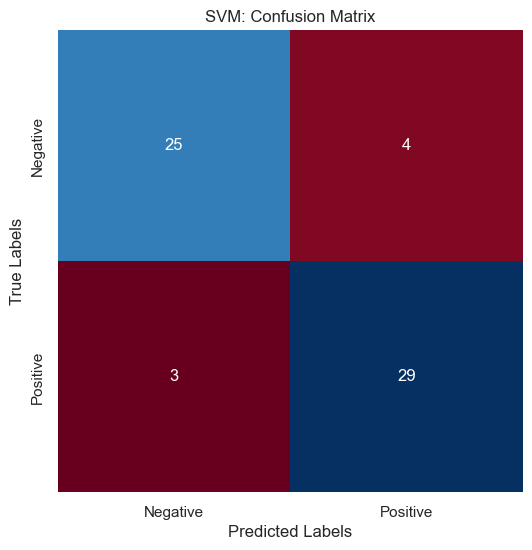

In [262]:
# Training the best model and measuring its training time
svm_model = SVC(kernel='poly')
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = svm_model.predict(X_test)
print(f"Time to train the SVM model: {training_time} seconds")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('SVM: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 2.5 RandomForest

In [263]:
param_grid = {
    'n_estimators': [100, 200], 
    'max_features': ['sqrt'], 
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1) 
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_params = grid_search.best_params_
# Training the best model and measuring its training time
best_model = RandomForestClassifier(**best_params, random_state=42)
start_time = time.time()
best_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Time to train the RF model:: {elapsed_time} seconds")
y_pred = best_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Time to train the RF model:: 0.04475593566894531 seconds
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


### 2.6 XGBoost

In [264]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           param_grid=param_grid, 
                           cv=3, 
                           verbose=2, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


In [265]:
model = Sequential()
model.add(Dense(64, activation='selu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
7/7 [==============================] - 0s 13ms/step - loss: 0.5932 - accuracy: 0.7202 - val_loss: 0.5505 - val_accuracy: 0.7143
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.7824 - val_loss: 0.5170 - val_accuracy: 0.7347
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8135 - val_loss: 0.4924 - val_accuracy: 0.7755
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8290 - val_loss: 0.4832 - val_accuracy: 0.7755
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8497 - val_loss: 0.4557 - val_accuracy: 0.7551
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8187 - val_loss: 0.4281 - val_accuracy: 0.7551
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.3704 - accuracy: 0.8187 - val_loss: 0.4185 - val_accuracy: 0.7551
Epoch 8/20
7/7 [=================